Importing necessary packages and libraries.

In [1]:
#Working With DataFrames
import pandas as pd
import numpy as np

#Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
df=pd.read_csv('Resources/data.csv')
df.head(3)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2.0,Nibble,3,299,0,1.0,1,7,0,1,...,1,1,100.0,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1,2
1,2.0,No Name Yet,1,265,0,1.0,1,2,0,2,...,1,1,0.0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2,0
2,1.0,Brisco,1,307,0,1.0,2,7,0,2,...,1,1,0.0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7,3


The following are the data fields corresponding to our project, which we obtained on Kaggle.com:
PetID - Unique hash ID of pet profile 
AdoptionSpeed - Categorical speed of adoption. Lower is faster. This is the value to predict. See below section for more info.
Type - Type of animal (1 = Dog, 2 = Cat)
Name - Name of pet (Empty if not named)
Age - Age of pet when listed, in months
Breed1 - Primary breed of pet (Refer to BreedLabels dictionary)
Breed2 - Secondary breed of pet, if pet is of mixed breed (Refer to BreedLabels dictionary)
Gender - Gender of pet (1 = Male, 2 = Female, 3 = Mixed, if profile represents group of pets)
Color1 - Color 1 of pet (Refer to ColorLabels dictionary)
Color2 - Color 2 of pet (Refer to ColorLabels dictionary)
Color3 - Color 3 of pet (Refer to ColorLabels dictionary)
MaturitySize - Size at maturity (1 = Small, 2 = Medium, 3 = Large, 4 = Extra Large, 0 = Not Specified)
FurLength - Fur length (1 = Short, 2 = Medium, 3 = Long, 0 = Not Specified)
Vaccinated - Pet has been vaccinated (1 = Yes, 2 = No, 3 = Not Sure)
Dewormed - Pet has been dewormed (1 = Yes, 2 = No, 3 = Not Sure)
Sterilized - Pet has been spayed / neutered (1 = Yes, 2 = No, 3 = Not Sure)
Health - Health Condition (1 = Healthy, 2 = Minor Injury, 3 = Serious Injury, 0 = Not Specified)
Quantity - Number of pets represented in profile
Fee - Adoption fee (0 = Free)
State - State location in Malaysia (Refer to StateLabels dictionary)
RescuerID - Unique hash ID of rescuer
VideoAmt - Total uploaded videos for this pet
PhotoAmt - Total uploaded photos for this pet
Description - Profile write-up for this pet. The primary language used is English, with some in Malay or Chinese.

At first glance, we saw a variable PetID, which we believed should have no predictive value. On the other hand, the variable Vaccinated is likely to be predictive (before analyzing the data, we believed that a pet that is vaccinated would be more likely to be adopted than a pet that is not vaccinated).

In [5]:
df.shape

(14993, 24)

This means the dataset has 24 columns and 14,993 rows

In [6]:
df.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14991.000000,14993.000000,14993.000000,14993.000000,14991.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14992.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457608,10.452078,265.272594,74.009738,1.776132,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259405,41346.028347,0.056760,3.889215,2.516441
std,0.498216,18.155790,60.056818,123.011575,0.681535,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.417131,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


To make headers consistent and help with regressions etc. , cleaning them up to all be lower case

In [7]:
df.columns=[i.lower() for i in df.columns]

Next, we found the amount of null values by column. Null values of a column could be a bad thing - if we find a null value for a column that we care about, we might have to throw out the entire row/datapoint. On the other hand, if the null value is for a variable that is not predictive, it might not matter. In some cases, it will be fine to fill in the data with key statistics such as the mean or mode. Either way, it's important to have a clean dataset.

In [9]:
df.isna().sum()

type                2
name             1257
age                 0
breed1              0
breed2              0
gender              2
color1              0
color2              0
color3              0
maturitysize        0
furlength           0
vaccinated          0
dewormed            0
sterilized          0
health              0
quantity            0
fee                 1
state               0
rescuerid           0
videoamt            0
description        12
petid               0
photoamt            0
adoptionspeed       0
dtype: int64

First, we dealt with "type." This variable tells us if the pet is a dog or a cat. With missing type, we don't know if the data point is a dog or a cat, and therefor we dropped the entire row.

In [10]:
df = df.dropna(subset=['type'])
df.isna().sum()

type                0
name             1257
age                 0
breed1              0
breed2              0
gender              2
color1              0
color2              0
color3              0
maturitysize        0
furlength           0
vaccinated          0
dewormed            0
sterilized          0
health              0
quantity            0
fee                 1
state               0
rescuerid           0
videoamt            0
description        12
petid               0
photoamt            0
adoptionspeed       0
dtype: int64

Next we dealt with the null value for "fee." We looked at the distribution:

In [11]:
df['fee'].value_counts().head(5)/len(df['fee'])

0.0      0.844573
50.0     0.031219
100.0    0.027216
200.0    0.014609
150.0    0.010806
Name: fee, dtype: float64

Nearly 85% of the fee values are 0, so we decided to replace null values with the (overwhelmingly popular) mode.

In [14]:
df['fee'].fillna(0,inplace=True)
df.isna().sum()

type                0
name             1257
age                 0
breed1              0
breed2              0
gender              2
color1              0
color2              0
color3              0
maturitysize        0
furlength           0
vaccinated          0
dewormed            0
sterilized          0
health              0
quantity            0
fee                 0
state               0
rescuerid           0
videoamt            0
description        12
petid               0
photoamt            0
adoptionspeed       0
dtype: int64

We decided to remove the variable "name" since it likely has no predictive power and the column has a lot of missing values.

In [15]:
df = df.drop('name',axis=1).dropna()
df.shape

(14977, 23)

In [16]:
df.isna().sum()

type             0
age              0
breed1           0
breed2           0
gender           0
color1           0
color2           0
color3           0
maturitysize     0
furlength        0
vaccinated       0
dewormed         0
sterilized       0
health           0
quantity         0
fee              0
state            0
rescuerid        0
videoamt         0
description      0
petid            0
photoamt         0
adoptionspeed    0
dtype: int64

According to the description, type 1 is a dog and type 2 is a cat. But, we want to see if we could figure that out on our own, by analyzing the description string.

In [17]:
df_type_test=df.loc[df['description'].str.contains('dog'),:]
df_type_test['type'].value_counts()/len(df_type_test)

1.0    0.924496
2.0    0.075504
Name: type, dtype: float64

Over 92% of the description strings that include the string"dog" are type 1! Thus, we would also have concluded that type 1 is a dog.
We found the percentage of the dataset that is dogs vs. cats, and began visualizing.

In [18]:
df['type'].value_counts()/len(df['type'])

1.0    0.542632
2.0    0.457368
Name: type, dtype: float64

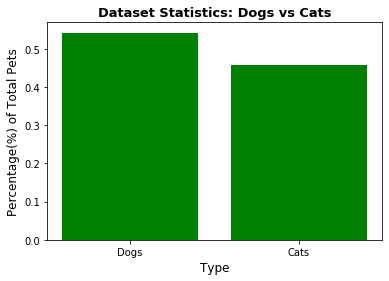

In [19]:
x=['Dogs','Cats']
y=[.542632,.457368]
plt.bar(x,y,color='g')
plt.title('Dataset Statistics: Dogs vs Cats',fontsize=13,fontweight='bold')
plt.xlabel('Type',fontsize=12)
plt.ylabel('Percentage(%) of Total Pets',fontsize=12)
plt.show()